<a href="https://colab.research.google.com/github/gitswathig/ML-Projects/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Forecasting.csv to Forecasting.csv


# Load Dataset

In [3]:
import pandas as pd

df = pd.read_csv("Forecasting.csv")
df.head()


,Date,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
0,2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
1,2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2,2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
3,2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
4,2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239


In [7]:
df = df[["Date", "Ticker", "Close", "Next_Day_Close"]]
df.head()


,Date,Ticker,Close,Next_Day_Close
0,2016-02-23,AAPL,21.465500,21.785145
1,2016-02-23,AMZN,27.646999,27.702000
2,2016-02-23,GOOGL,35.595547,35.774696
3,2016-02-23,META,104.728432,106.138588
4,2016-02-23,MSFT,45.135513,45.294239


# Convert Date & Sort

In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Ticker", "Date"])


/tmp/ipython-input-3450611806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])


# SELECT ONE STOCK

In [9]:
stock_df = df[df["Ticker"] == "AAPL"].copy()
stock_df.head()


,Date,Ticker,Close,Next_Day_Close
0,2016-02-23,AAPL,21.465500,21.785145
6,2016-02-24,AAPL,21.785145,21.934757
12,2016-02-25,AAPL,21.934757,21.968756
18,2016-02-26,AAPL,21.968756,21.918888
24,2016-02-29,AAPL,21.918888,22.789389


# Prepare Data for Prophet

In [10]:
prophet_df = stock_df[["Date", "Next_Day_Close"]]
prophet_df.columns = ["ds", "y"]
prophet_df.head()


,ds,y
0,2016-02-23,21.785145
6,2016-02-24,21.934757
12,2016-02-25,21.968756
18,2016-02-26,21.918888
24,2016-02-29,22.789389


# Train–Test Split

In [11]:
train_size = int(len(prophet_df) * 0.8)

train = prophet_df.iloc[:train_size]
test = prophet_df.iloc[train_size:]


# Train Prophet Model

In [12]:
from prophet import Prophet

model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True
)

model.fit(train)


# Forecast Next-Day Prices

In [13]:
future = model.make_future_dataframe(periods=len(test), freq="D")
forecast = model.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-02-23,21.835423,12.030621,29.769744,21.835423,21.835423,-0.854753,-0.854753,-0.854753,0.831624,...,0.097472,0.097472,0.097472,-1.783848,-1.783848,-1.783848,0.0,0.0,0.0,20.980670
1,2016-02-24,21.842427,11.906804,29.271059,21.842427,21.842427,-1.297753,-1.297753,-1.297753,0.831624,...,-0.075609,-0.075609,-0.075609,-2.053768,-2.053768,-2.053768,0.0,0.0,0.0,20.544674
2,2016-02-25,21.849431,11.340599,29.678517,21.849431,21.849431,-1.471537,-1.471537,-1.471537,0.831624,...,0.011307,0.011307,0.011307,-2.314468,-2.314468,-2.314468,0.0,0.0,0.0,20.377894
3,2016-02-26,21.856436,11.090179,28.285737,21.856436,21.856436,-1.760676,-1.760676,-1.760676,0.831624,...,-0.028978,-0.028978,-0.028978,-2.563323,-2.563323,-2.563323,0.0,0.0,0.0,20.095759
4,2016-02-29,21.877448,10.638276,29.125588,21.877448,21.877448,-2.180491,-2.180491,-2.180491,0.831624,...,0.203713,0.203713,0.203713,-3.215828,-3.215828,-3.215828,0.0,0.0,0.0,19.696958


# Model Evaluation (MAE & RMSE)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test["y"].values
y_pred = forecast["yhat"].iloc[-len(test):].values

print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))


MAE: 21.276449551217933
RMSE: 24.7163600193971


# Forecast Visualization

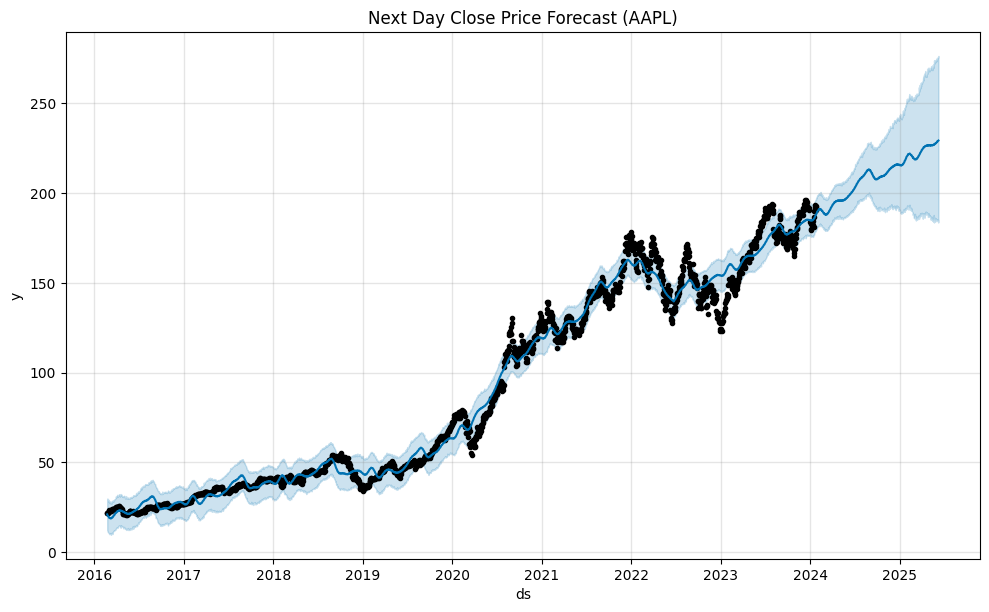

In [15]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.title("Next Day Close Price Forecast (AAPL)")
plt.show()


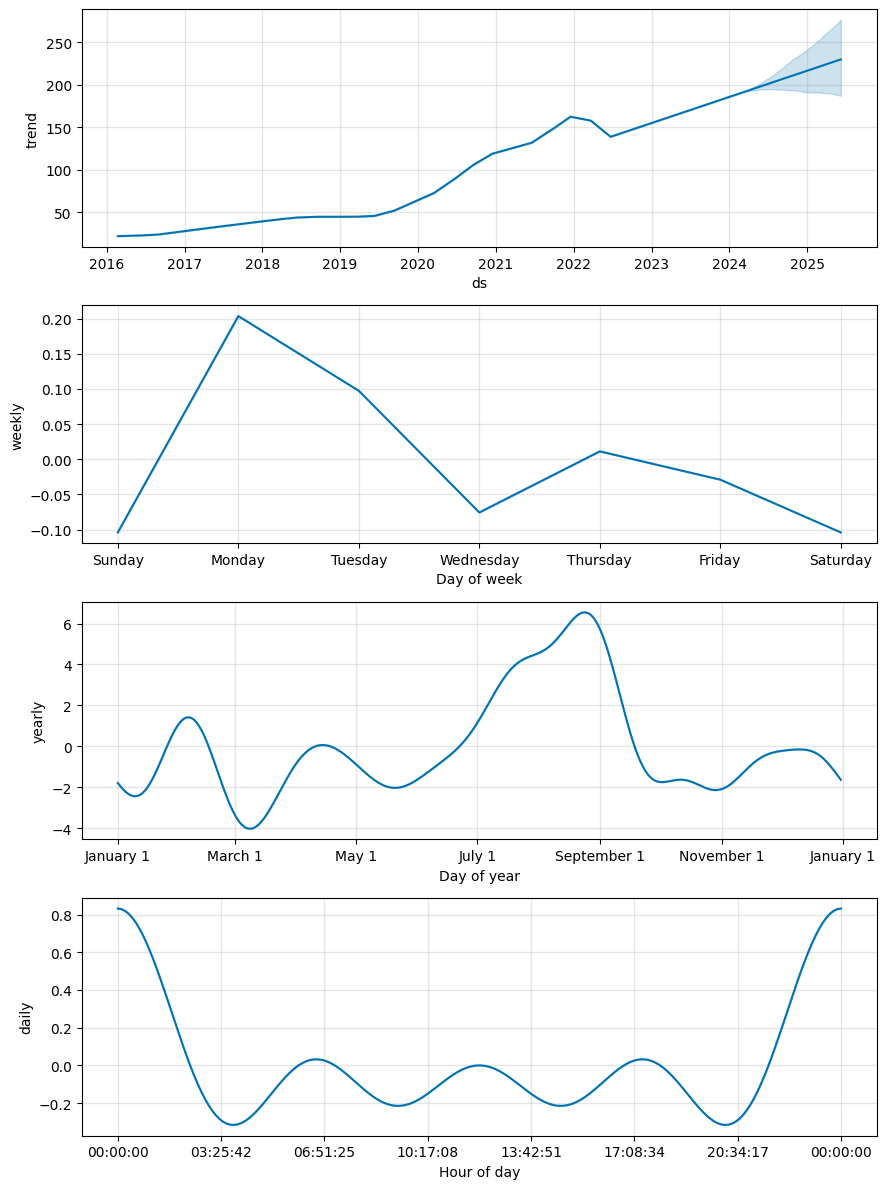

In [16]:
model.plot_components(forecast)
plt.show()
